## Exploratory Data Analysis 
This notebook conducts an Exploratory Data Analysis (EDA) on a dataset related to insurance policies. 
It includes steps for importing the dataset, reviewing its structure, checking for missing values, 
and performing descriptive statistics on key numerical features. 
Additionally, it sets the stage for univariate analysis to visualize the distribution of variables.


In [1]:
# Import Dataset and useful libraries 
import os 
import pandas as pd 
os.chdir('../scripts/')
import utils as util 


data_path = "../Data/dataset.csv"
data_dict = util.read_csv_file(data_path)
df = data_dict.get('data')


c:\Users\Administrator\Documents\Projects\Tech company\TenX\projects\AlphaCare_Insurance_ML\scripts\utils.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [2]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      959866 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
# Descriptive Statistics
variability = df[['TotalPremium', 'TotalClaims']].describe().loc[['std', 'min', 'max']]
print("Variability for numerical features:\n", variability)

# Data Structure Review
dtypes = df.dtypes
print("\nData types of each column:\n", dtypes)


Variability for numerical features:
      TotalPremium    TotalClaims
std    230.284513    2384.074695
min   -782.576754  -12002.412281
max  65282.603421  393092.105263

Data types of each column:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model     

In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Bank                         40232
AccountType                  40232
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


### Univariate Analysis: Distribution of Variables
This section of code performs univariate analysis by visualizing the distribution of numerical variables in the dataset.
It identifies numerical columns and generates histograms for each, allowing for an assessment of their frequency distributions.

The histograms provide insights into the spread, central tendency, and potential outliers of the data.
The code also includes a check for NaN values to ensure that only valid data is plotted, 
and it handles cases where a column may contain only NaN values by plotting an empty histogram.

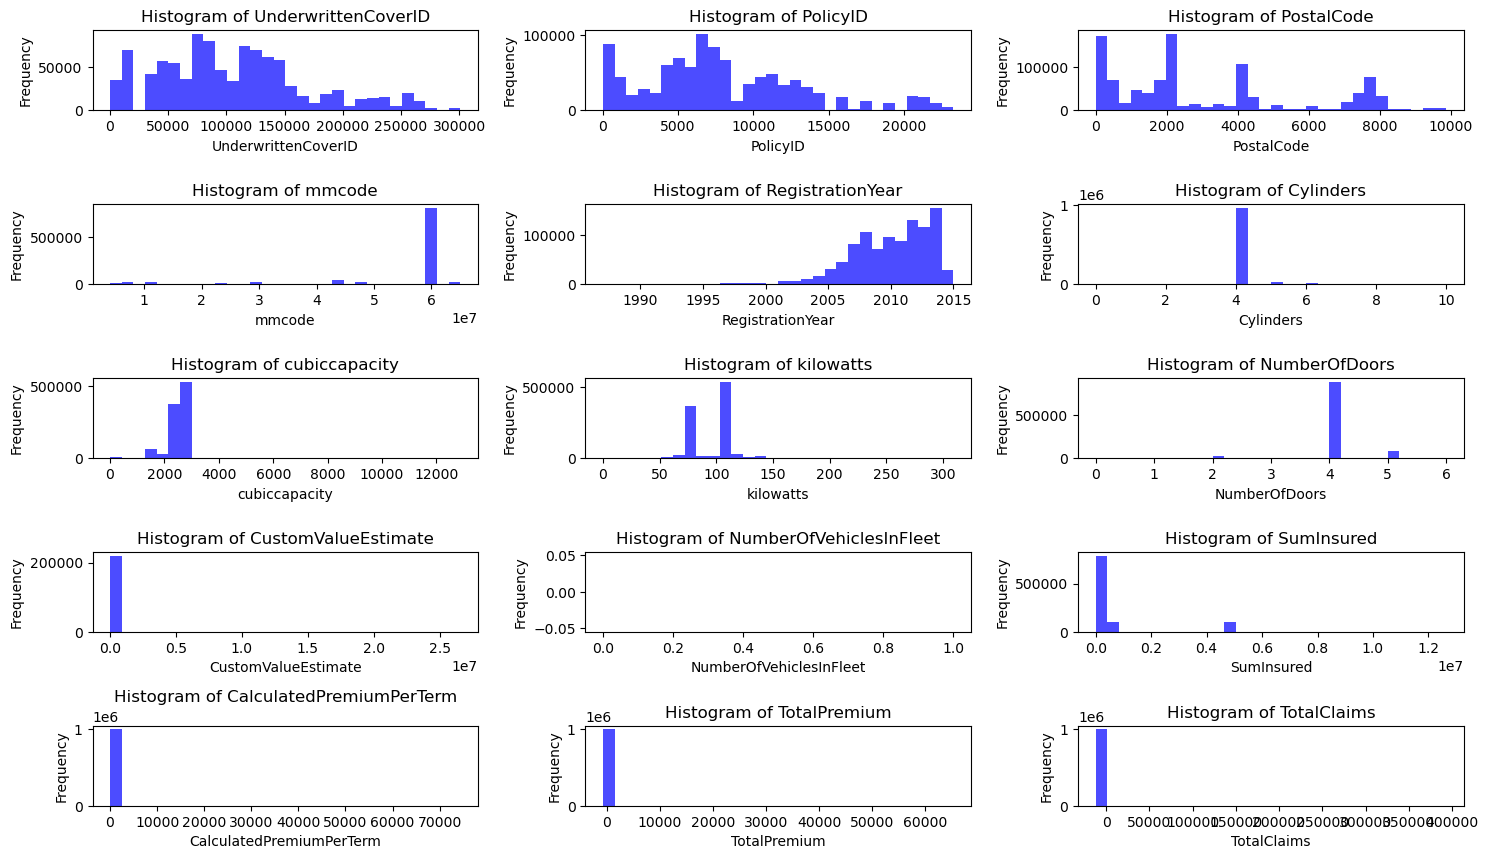

In [14]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    # Check for NaN values and plot only if there are valid values
    if df[col].notnull().any():
        plt.hist(df[col].dropna(), bins=30, color='blue', alpha=0.7)
    else:
        plt.hist([], bins=30, color='blue', alpha=0.7)  # Empty histogram if all values are NaN
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



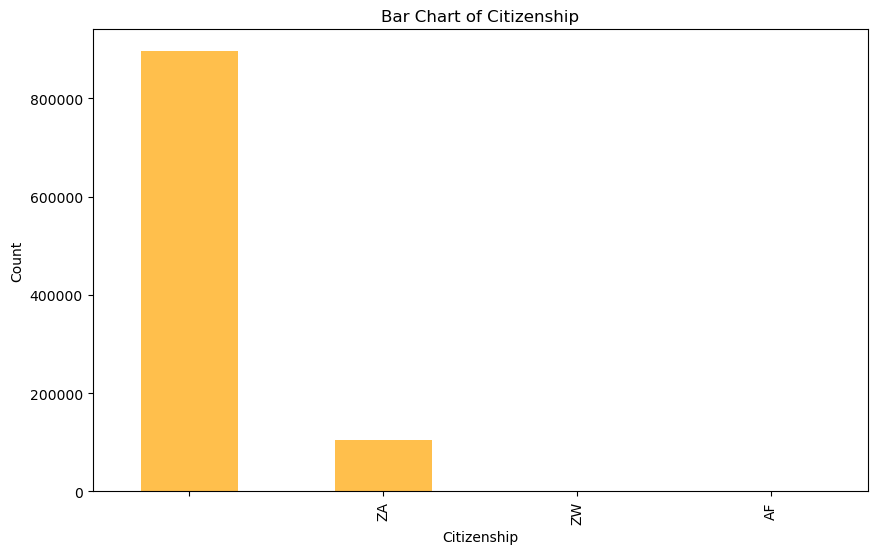

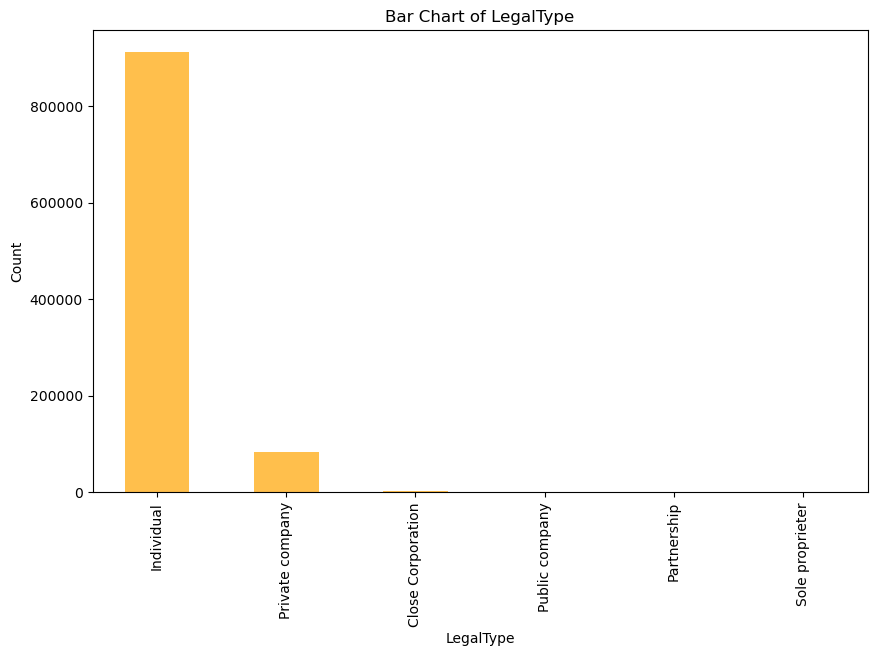

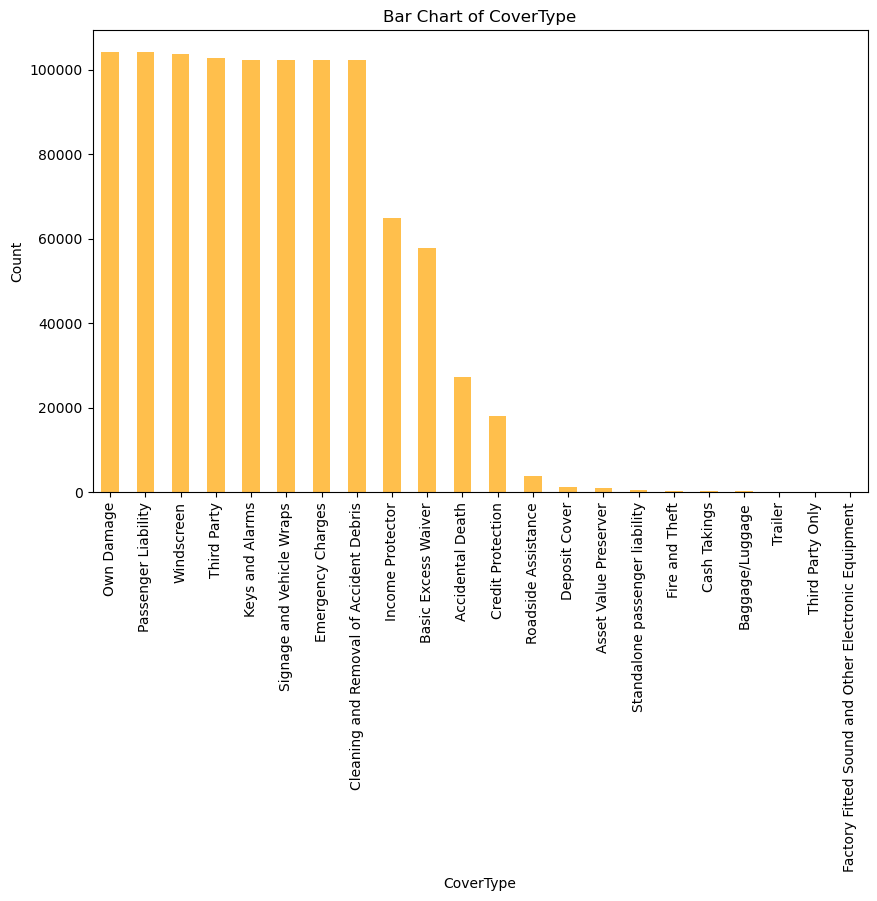

In [19]:
# Select specific categorical columns to plot
selected_categorical_cols = ['Citizenship', 'LegalType', 'CoverType']  # Example of selective columns

for col in selected_categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


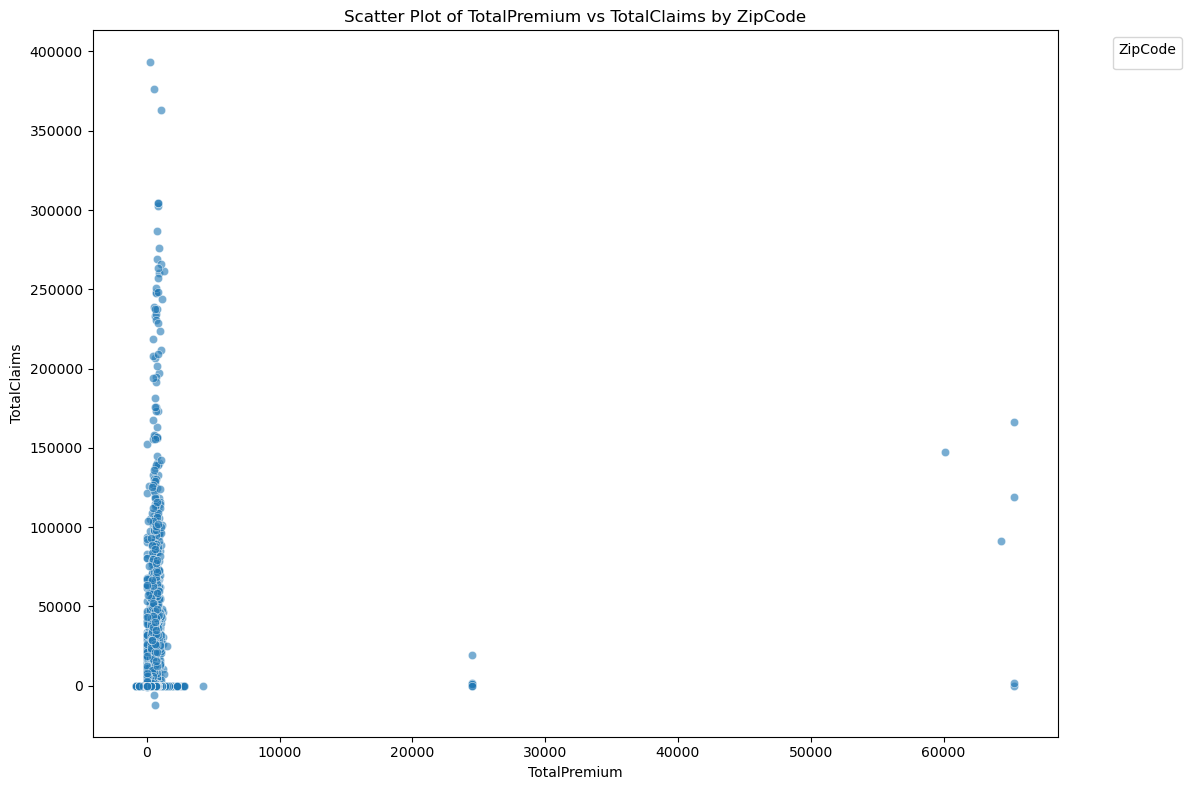

In [26]:
# Bivariate Analysis: Correlations and Associations
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', alpha=0.6)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by ZipCode')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='ZipCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


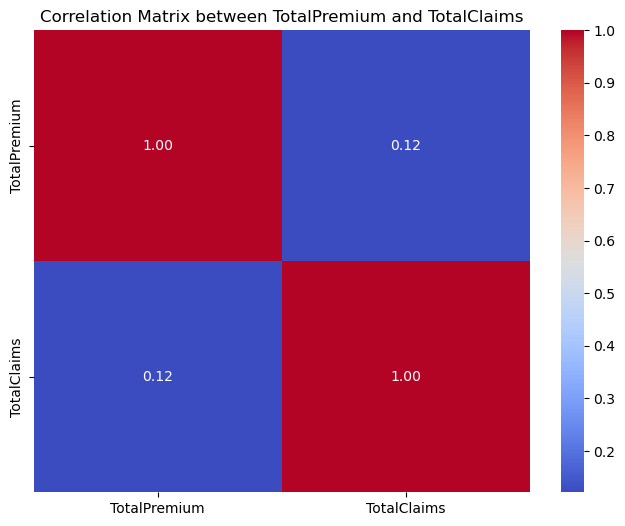

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between TotalPremium and TotalClaims')
plt.show()

This section of code analyzes insurance policy data by first grouping the data by 'CoverType' 
to calculate the average premium associated with each type of cover. The results are then 
visualized using a bar plot, which displays the average total premium for each cover type, 
allowing for easy comparison of costs across different insurance options.

Following this, the code examines how the popularity of various cover types has changed over time. 
It converts the 'TransactionMonth' column to a datetime format and extracts the year to facilitate 
yearly analysis. The data is then grouped by year and cover type to count the number of policies 
for each cover type annually. This information is visualized with a line plot, which illustrates 
trends in insurance cover types over the years, providing insights into how consumer preferences 
may have shifted.

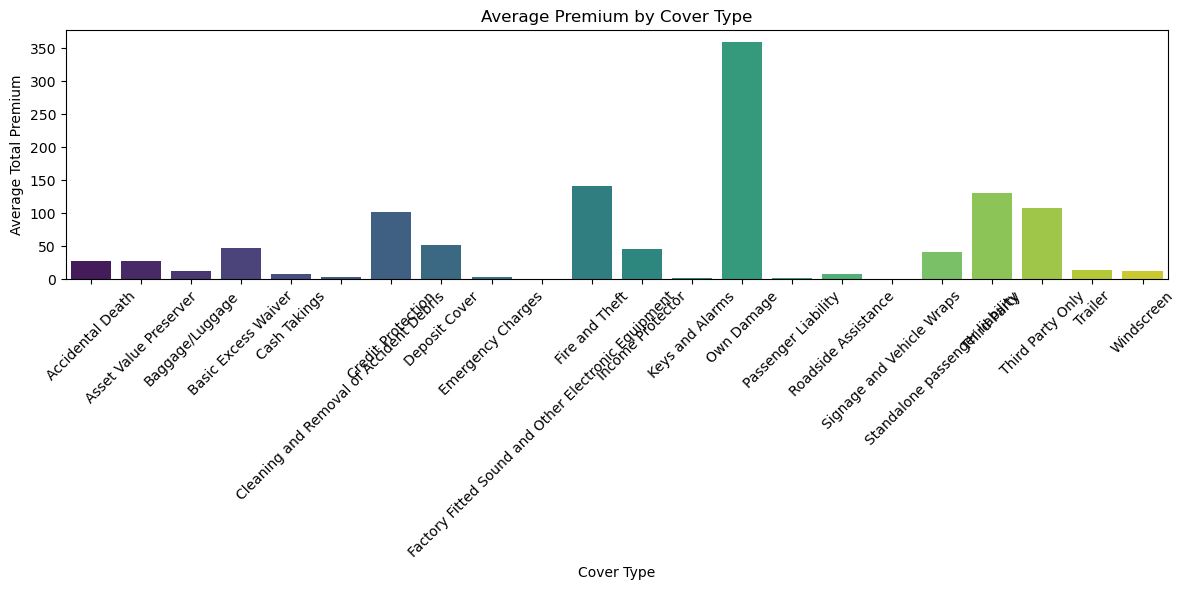

<Figure size 1400x700 with 0 Axes>

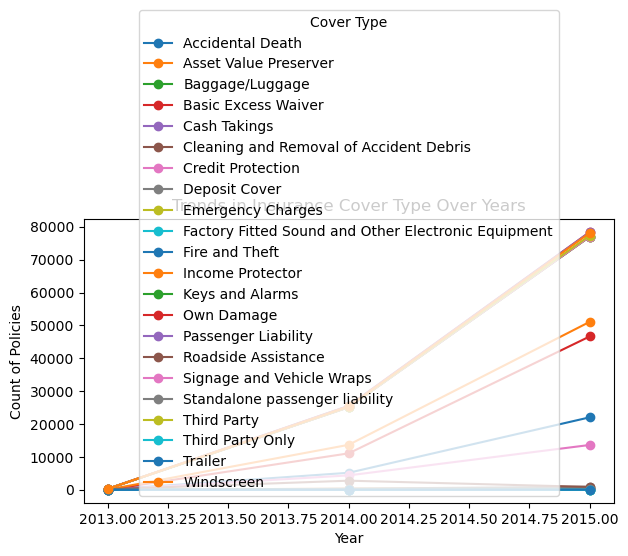

In [27]:


cover_type_trends = df.groupby('CoverType')['TotalPremium'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cover_type_trends, x='CoverType', y='TotalPremium', palette='viridis')
plt.title('Average Premium by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['Year'] = df['TransactionMonth'].dt.year

cover_type_yearly = df.groupby(['Year', 'CoverType']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
cover_type_yearly.plot(kind='line', marker='o')
plt.title('Trends in Insurance Cover Type Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Policies')
plt.legend(title='Cover Type')
plt.tight_layout()
plt.show()


### Summary of the Analysis
The code above performs a detailed exploratory data analysis on insurance policy data. 
It first calculates the correlation matrix between 'TotalPremium' and 'TotalClaims', 
visualizing it with a heatmap to identify any relationships between these two variables. 
The heatmap indicates the strength and direction of the correlation, helping to understand 
how changes in total premium might affect total claims.

Next, the code groups the data by 'CoverType' to calculate the average premium for each 
cover type, visualizing this information with a bar plot. This plot provides insights 
into which cover types are associated with higher average premiums.

Finally, the analysis examines trends in insurance cover types over the years. 
By converting 'TransactionMonth' to a datetime format and extracting the year, 
the code groups the data to count the number of policies for each cover type per year. 
A line plot is then created to visualize these trends, allowing for an understanding 
of how the popularity of different cover types has changed over time.

Overall, this analysis provides valuable insights into the relationships between 
premiums and claims, the average costs associated with different cover types, 
and the evolving trends in insurance coverage.
